In [1]:
!nvidia-smi

Sun Feb 18 07:27:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install tensorflow==2.4.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [5]:
!python --version

Python 3.10.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity
import os

In [18]:
!ls

sample_data  sign_data.zip


In [19]:
!wget https://www.dropbox.com/scl/fi/vl67yvd806x1iimfczvk7/sign_data.zip?rlkey=yz9k465r8oo2ie6uwuru686ta&dl=0

--2024-02-18 06:51:39--  https://www.dropbox.com/scl/fi/vl67yvd806x1iimfczvk7/sign_data.zip?rlkey=yz9k465r8oo2ie6uwuru686ta
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e575a84f490bf377ca4fda767.dl.dropboxusercontent.com/cd/0/inline/CNcZkOFUHCi8PROCjTX3tX2ThJjvH6Waa_holzNgnBbkg_WQHE_iwojETvQGDirHN-a-ZSCEsbEMRWqV4RfBAoLFnxGkx4GJCeKM5N3Zijjy5a1Irj7qfAcEIDJmm2v07VMbCe-HSwUbsP87lQ7eDdz6/file# [following]
--2024-02-18 06:51:39--  https://uc8e575a84f490bf377ca4fda767.dl.dropboxusercontent.com/cd/0/inline/CNcZkOFUHCi8PROCjTX3tX2ThJjvH6Waa_holzNgnBbkg_WQHE_iwojETvQGDirHN-a-ZSCEsbEMRWqV4RfBAoLFnxGkx4GJCeKM5N3Zijjy5a1Irj7qfAcEIDJmm2v07VMbCe-HSwUbsP87lQ7eDdz6/file
Resolving uc8e575a84f490bf377ca4fda767.dl.dropboxusercontent.com (uc8e575a84f490bf377ca4fda767.dl.dropboxusercontent.com)... 162.125.1.15, 2620:

In [23]:
!ls -l

total 307596
drwxr-xr-x 1 root root      4096 Feb 14 14:28  sample_data
-rw-r--r-- 1 root root 314969655 Feb 18 06:51 'sign_data.zip?rlkey=yz9k465r8oo2ie6uwuru686ta'


In [25]:
!mv sign_data.zip\?rlkey\=yz9k465r8oo2ie6uwuru686ta sign_data.zip

In [26]:
!unzip sign_data.zip

Archive:  sign_data.zip
   creating: sign_data/
  inflating: sign_data/test_data.csv  
  inflating: sign_data/train_data.csv  
   creating: sign_data/test/
   creating: sign_data/test/049/
  inflating: sign_data/test/049/01_049.png  
  inflating: sign_data/test/049/02_049.png  
  inflating: sign_data/test/049/03_049.png  
  inflating: sign_data/test/049/04_049.png  
  inflating: sign_data/test/049/05_049.png  
  inflating: sign_data/test/049/06_049.png  
  inflating: sign_data/test/049/07_049.png  
  inflating: sign_data/test/049/08_049.png  
  inflating: sign_data/test/049/09_049.png  
  inflating: sign_data/test/049/10_049.png  
  inflating: sign_data/test/049/11_049.png  
  inflating: sign_data/test/049/12_049.png  
   creating: sign_data/test/049_forg/
  inflating: sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign

In [3]:
train_directory = 'sign_data/train'
test_directory = 'sign_data/test'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.1,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1
)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size = (224, 224),
    color_mode = 'rgb',
    shuffle = True,
    batch_size=32

)


test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size = (224, 224),
    color_mode = 'rgb',
    shuffle = True,
    batch_size=32
)

Found 1649 images belonging to 128 classes.
Found 1649 images belonging to 128 classes.


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

vgg_basemodel = VGG16(include_top=True)

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [6]:
# vgg_model = tf.keras.Sequential(vgg_basemodel.layers[:-1])
# vgg_model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [13]:
vgg_model = tf.keras.Sequential(vgg_basemodel.layers[:-1])
vgg_model.add(tf.keras.layers.Dense(128, activation = 'softmax'))

In [7]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in vgg_model.layers[:-1]:
    layer.trainable = False

vgg_model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.legacy.SGD(momentum=0.9, lr=0.001),
                  metrics=['accuracy'])

In [15]:
history = vgg_model.fit(train_generator,
              epochs=30,
              batch_size=64,
              validation_data=test_generator,
              callbacks=[early_stopping])

Epoch 1/30
52/52 [==============================] - 33s 627ms/step - loss: 5.0689 - accuracy: 0.0091 - val_loss: 4.9373 - val_accuracy: 0.0133
Epoch 2/30
52/52 [==============================] - 32s 624ms/step - loss: 4.9332 - accuracy: 0.0188 - val_loss: 4.7719 - val_accuracy: 0.0327
Epoch 3/30
52/52 [==============================] - 33s 627ms/step - loss: 4.8345 - accuracy: 0.0437 - val_loss: 4.7013 - val_accuracy: 0.0722
Epoch 4/30
52/52 [==============================] - 32s 627ms/step - loss: 4.7547 - accuracy: 0.0449 - val_loss: 4.6885 - val_accuracy: 0.0764
Epoch 5/30
52/52 [==============================] - 33s 629ms/step - loss: 4.6885 - accuracy: 0.0655 - val_loss: 4.5198 - val_accuracy: 0.0995
Epoch 6/30
52/52 [==============================] - 35s 678ms/step - loss: 4.6026 - accuracy: 0.0770 - val_loss: 4.4620 - val_accuracy: 0.1243
Epoch 7/30
52/52 [==============================] - 32s 616ms/step - loss: 4.5530 - accuracy: 0.0837 - val_loss: 4.3769 - val_accuracy: 0.1522

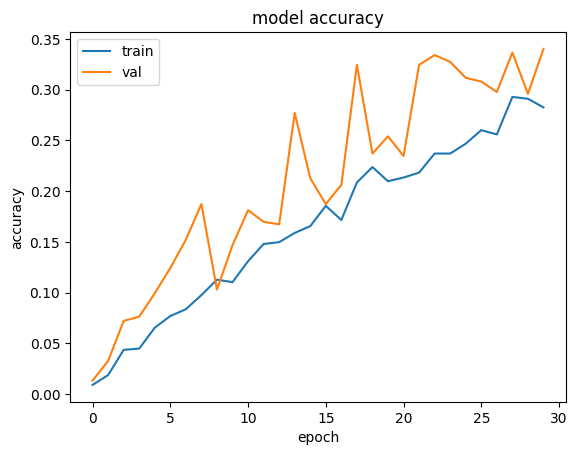

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

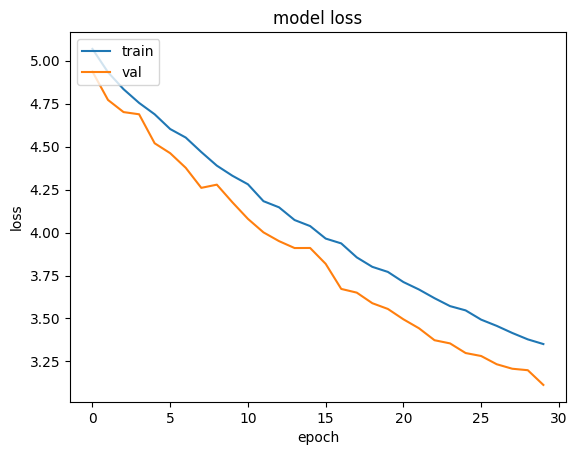

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
!mkdir mytest

In [38]:
!unzip mytest/test.zip

Archive:  mytest/test.zip
   creating: test/
   creating: test/01/
  inflating: test/01/neg.png         
  inflating: test/01/anc.png         
  inflating: test/01/pos.png         
   creating: test/02/
  inflating: test/02/neg.png         
  inflating: test/02/anc.png         
  inflating: test/02/pos.png         
   creating: test/03/
  inflating: test/03/neg.png         
  inflating: test/03/anc.png         
  inflating: test/03/pos.png         
   creating: test/04/
  inflating: test/04/neg.png         
  inflating: test/04/anc.png         
  inflating: test/04/pos.png         
   creating: test/05/
  inflating: test/05/neg.png         
  inflating: test/05/anc.png         
  inflating: test/05/pos.png         


In [21]:
# vgg_model = tf.keras.models.load_model('saved_models/vgg_finetuned_model')
feature_extractor = tf.keras.Sequential(vgg_model.layers[:-1])

In [42]:
def load_image(image_path):
    '''Return the image in the format required by VGG16 model.'''
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_features(paths):
    '''Returns the features extracted by the model.'''
    feature_list = []
    for images in paths:
        features = {}
        features['anchor'] = feature_extractor.predict(load_image(images[0]))
        features['negative'] = feature_extractor.predict(load_image(images[1]))
        features['positive'] = feature_extractor.predict(load_image(images[2]))
        feature_list.append(features)

    return feature_list

def cosine_similarity_fn(feature_list):
    '''Returns the cosine similarity between the two signature images.'''
    cosine_similarities = []
    for path in feature_list:
        similarities = {}
        similarities['matching_pair_score'] = cosine_similarity(path['positive'], path['anchor'])[0][0]
        similarities['non_matching_pair_score'] = cosine_similarity(path['negative'], path['anchor'])[0][0]
        cosine_similarities.append(similarities)
    return cosine_similarities

In [64]:
root = 'test'
image_set = []
directories = sorted(os.listdir(root))

for directory in directories:
    current_root = os.path.join(root, directory)
    image_set.append([os.path.join(current_root, img) for img in sorted(os.listdir(current_root))])

In [65]:
image_set

[['test/01/anc.png', 'test/01/neg.png', 'test/01/pos.png'],
 ['test/02/anc.png', 'test/02/neg.png', 'test/02/pos.png'],
 ['test/03/anc.png', 'test/03/neg.png', 'test/03/pos.png'],
 ['test/04/anc.png', 'test/04/neg.png', 'test/04/pos.png'],
 ['test/05/anc.png', 'test/05/neg.png', 'test/05/pos.png']]

In [66]:
feature_set = extract_features(image_set)
cosine_similarities = cosine_similarity_fn(feature_set)

1/1 [==============================] - 0s 17ms/step


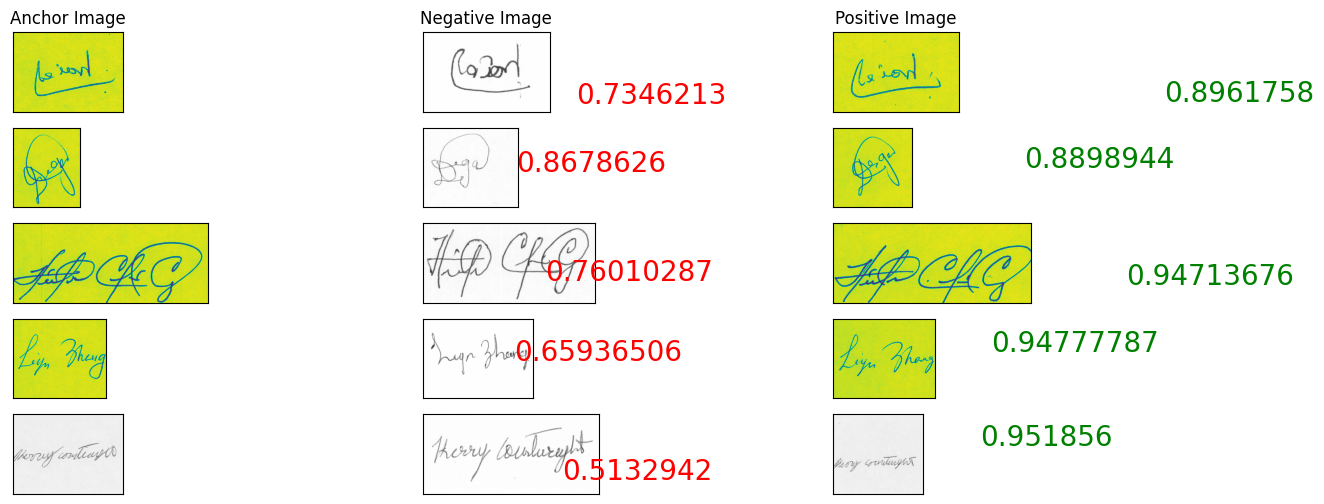

In [67]:
fig, axs = plt.subplots(len(image_set), 3, figsize=(15, 6), facecolor='w', edgecolor='k')


for i, cs in enumerate(cosine_similarities):
    axs[i][0].imshow(plt.imread(image_set[i][0]))
    axs[i][1].imshow(plt.imread(image_set[i][1]))
    axs[i][2].imshow(plt.imread(image_set[i][2]))

    axs[i][1].text(450, 210, cs['non_matching_pair_score'],fontsize = 20, color ="red")
    axs[i][2].text(950, 200, cs['matching_pair_score'],fontsize = 20, color ="green")

    axs[i][0].set_anchor('NW')
    axs[i][1].set_anchor('NW')
    axs[i][2].set_anchor('NW')

for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])

for ax, col in zip(axs[0], ['Anchor Image', 'Negative Image', 'Positive Image']):
    ax.set_title(col)

In [68]:
vgg_model.save('sign_verification_model')

In [69]:
!zip -r9 sign_verification_model.zip sign_verification_model

  adding: sign_verification_model/ (stored 0%)
  adding: sign_verification_model/assets/ (stored 0%)
  adding: sign_verification_model/saved_model.pb (deflated 90%)
  adding: sign_verification_model/variables/ (stored 0%)
  adding: sign_verification_model/variables/variables.index (deflated 67%)
  adding: sign_verification_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: sign_verification_model/keras_metadata.pb (deflated 96%)
  adding: sign_verification_model/fingerprint.pb (stored 0%)
